
#####################
### DO THIS FIRST ###
#####################

In [42]:

import random
import matplotlib.pyplot as plt
from IPython import display
import time

random.seed(32) # for reproducible random numbers

#####################
### DO THIS FIRST ###
#####################

# replace each pass statement with the appropriate code
# make sure to add New_List_of_Agents (line 41)
# fill it in or copy the code from lab

class Agent():
    # LAB PROB 1
    def __init__(self, xlocation, ylocation):
        self.x = xlocation
        self.y = ylocation

agent1 = Agent(22, 55)
agent2 = Agent(66, 88)

def map_all_agents(listofagents):
    # LAB PROB 4; COPY ONLY THE FUNCTION (NOT THE FUNCTION CALLS)
    agents_XCoordinate = [] # this is an empty list that will store our X-coordinates, don't change this command
    agents_YCoordinate = [] # this is an empty list that will store our y-coordinates, don't change this command
    
    ### use a for loop to add all the x attributes from our list of objects to the agents_XCoordinate list and all the y attributes from our list of objects to the agents_YCoordinate list 
    for agent in listofagents:
        agents_XCoordinate.append(agent.x)
        agents_YCoordinate.append(agent.y)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_facecolor('azure')
    ax.plot(agents_XCoordinate, agents_YCoordinate, 'o', markerfacecolor='purple')
    plt.xlim(-5,105)
    plt.ylim(-5,105)
    ax.set_title("Here's our map of the agents we have created:")
    plt.show()
    
agents_list = [agent1, agent2]

def moveagents(listofagents):
    # LAB PROB 6; COPY ONLY THE FUNCTION (NOT THE FUNCTION CALLS)
    for each_agent in listofagents:
        each_agent.x = random.randint(0,100)
        each_agent.y = random.randint(0,100)

def make_agents_dance(agentslist, num_steps=10):
    # LAB PROB 8; COPY ONLY THE FUNCTION (NOT THE FUNCTION CALLS)
    for i in range(num_steps):
        moveagents(agentslist)
        map_all_agents(agentslist)
        time.sleep(1) # keep this command 4th
        display.clear_output(wait=True) # keep this command last

#######################################################################

### add New_List_of_Agents from LAB PROB 9
New_List_of_Agents = [Agent(random.randint(0,100), random.randint(0,100))for i in range(12)]  ### make 12 agents

####################################################


class AgentNew(Agent):
    # LAB PROB 10; COPY ONLY THE FUNCTION (NOT THE FUNCTION CALLS)
    def __init__(self, xlocation, ylocation, group, status="unhappy"):  # using x, y instead of xlocation, ylocation works too...
        super().__init__(xlocation, ylocation)                          # ...as long as you change this to x, y
        self.group = group
        self.status = status



Problem 1

In [43]:
# The class AgentNew randomly picks whether an agent will be purple or gold.
# We may want to specify that instead, so lets create two subclasses of AgentNew.
# Let's call them PurpleAgents and GoldAgents.
# Below is flawed code for the subclass PurpleAgents.
# You can fix it simply by deleting/editing the mistakes I have made.
# You don't have to add any new lines.
# Once it's fixed, go ahead and create an analogous subclass called GoldAgents,
# which has the default group="Gold".

class PurpleAgents(AgentNew):
    def __init__(self, xlocation, ylocation, group="Purple", status="unhappy"):
        super().__init__(xlocation, ylocation, group, status)

class GoldAgents(AgentNew):
    def __init__(self, xlocation, ylocation, group="Gold", status="unhappy"):
        super().__init__(xlocation, ylocation, group, status)
        
b1 = PurpleAgents(3,6)
print(b1.group)
b2 = GoldAgents(1,2)
print(b2.group)

Purple
Gold


Problem 2

In [44]:
# Let's test our new classes and see if they work.
# If you complete the code below you should get a figure that looks like Plot7
# in the pdf.

random.seed(15)
List_of_PurpleAgents = [PurpleAgents(random.randint(0,100), random.randint(0,100))for i in range(12)]  ### using list comprehension, make 12 PurpleAgents
List_of_GoldAgents = [GoldAgents(random.randint(0,100), random.randint(0,100))for i in range(12)]  ### using list comprehension, make 12 GoldAgents
CombinedList = List_of_PurpleAgents + List_of_GoldAgents  ### using your knowledge of list methods, combine these into one list

#### Note CombinedList Must have the PurpleAgents before the GoldAgents

def map_colorful_agents(lst):  # what argument should go in this function?

    Purple_XCoordinate = [agent.x for agent in lst if agent.group=="Purple"] ### fill in the blanks to make this list comprehension work
    Purple_YCoordinate = [agent.y for agent in lst if agent.group=="Purple"] # model this after the above list comprehension
    Gold_XCoordinate = [agent.x for agent in lst if agent.group=="Gold"]
    Gold_YCoordinate = [agent.y for agent in lst if agent.group=="Gold"]

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_facecolor('azure')
    ax.plot(Purple_XCoordinate, Purple_YCoordinate, 'o', markerfacecolor='purple')
    ax.plot(Gold_XCoordinate, Gold_YCoordinate, 'o', markerfacecolor='gold')
    plt.xlim(-5,105)
    plt.ylim(-5,105)
    ax.set_title("Here's our map of the agents we have created:")
    plt.show()


In [45]:
#map_colorful_agents(CombinedList) #Delete before in OJ

Problem 3

In [46]:
# Now that we have some agents of different groups, let's add a
# method to AgentNew that allows agents to move if they are unhappy.

random.seed(38)
class AgentNew():

### PASTE IN YOUR CONSTRUCTOR
    def __init__(self, xlocation, ylocation, group, status="unhappy"): 
        self.x = xlocation
        self.y = ylocation
        self.group = group
        self.status = status
        
    def move_if_unhappy(self):  # what arguement(s) are needed here?
        if self.status == "unhappy":  ### there is a mistake in this command - fix it
            self.x = random.randint(0,100)
            self.y = random.randint(0,100)

a55 = AgentNew(24,11,"Purple")

a55.move_if_unhappy()  ### there is something wrong with this command - fix it

print(a55.x)  ### if your class is set up right the printed answer should be 81 (not 24)

81


Problem 4

In [47]:
# Now we are going to make our most complicated method.
# We're going to build a method called 'check_neighbors' which will identify
# the agents that are within 10 x-coordinate AND 10 y-coordinate spaces of a
# given agent. Once those agents are identified, we'll calculate if enough of
# them are of the same group to meet our pre-determined threshold.
# MAKE SURE TO USE A LAMBDA FUNCTION WHERE INDICATED.
# MAKE SURE TO USE LIST COMPREHENSIONS WHERE INDICATED.
# Fill in the code below.
class AgentNew():

    ### PASTE IN YOUR CONSTRUCTOR
    def __init__(self, xlocation, ylocation, group, status="unhappy"): 
        self.x = xlocation
        self.y = ylocation
        self.group = group
        self.status = status
    ### paste in move_if_unhappy method
    def move_if_unhappy(self):  # what arguement(s) are needed here?
        if self.status == "unhappy":  ### there is a mistake in this command - fix it
            self.x = random.randint(0,100)
            self.y = random.randint(0,100)

    def check_neighbors(self, agentlist):  # note this method needs not only the self attributes - it also needs a list of agents
        zlist = list(filter(lambda x: (x.x - self.x < 10) and (x.x - self.x) > -10, agentlist))### here, use a filter and a lambda function to find all agents in a list who are within 10 spaces in the X direction of the agent that is calling the method
        zlist = list(filter(lambda x: (x.y - self.y < 10) and (x.y - self.y) > -10, zlist))### do the same thing now to filter for agents within 10 spaces in the y direction - what list do you want to apply this lambda function to?
        same_group_neighbor =  [agent for agent in zlist if agent.group == self.group]### use list comprehension to only keep members of zlist who are of the same group as this agent
        opposite_group_neighbor = [agent for agent in zlist if agent.group != self.group]### use list comprehension to only keep members of zlist who are of the opposite group as this agent
        #print(len(same_group_neighbor), "same group neighbors, and ", len(zlist), " total neighbors" ) #Delete# this is commented out but you can use this as a diagnostic to make sure its working
        if (len(same_group_neighbor)+.01)/(len(zlist)+.01) > group_affinity_threshold: # this command works; it checks the percentage of same group neighbors against some threshold to determine the agents happiness
            self.status="happy"
        else:
            self.status="unhappy"
#=10?

In [48]:
#test = AgentNew(50,30,'Purple')
#test.check_neighbors(List_of_PurpleAgents)

Problem 5

In [49]:
# Now that you've added some methods to the class AgentNew, can you call them
# from the child class? Why or why not?

#No, because the child classes was defined before the AgentNew being updated.

# Test the code below and find out. If necessary, add some code to make those
# methods available to objects from the classes PurpleAgents and GoldAgents.

random.seed(34)
class PurpleAgents(AgentNew):
    def __init__(self, xlocation, ylocation, group="Purple", status="unhappy"):
        super().__init__(xlocation, ylocation, group, status)

class GoldAgents(AgentNew):
    def __init__(self, xlocation, ylocation, group="Gold", status="unhappy"):
        super().__init__(xlocation, ylocation, group, status)

p32 = PurpleAgents(14,55)
p32.move_if_unhappy()
print(p32.x)  # what do you expect the output to be?

67


Problem 6A

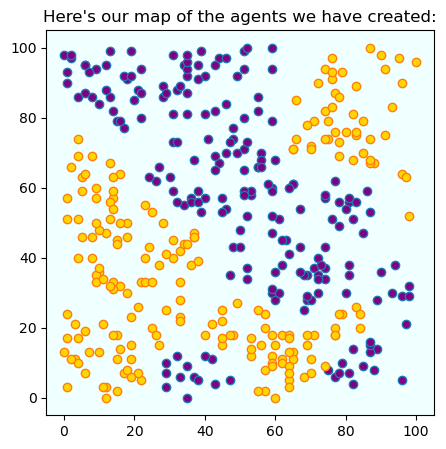

14


In [50]:

# Now we're ready to put it all together and run a few simulations.
# First, let's run a simulation in which there are 200 Purple agents and
# 200 Gold agents.
# Notice the group_affinity_threshold is set at .51.
# This means each purple or gold agent wants to be in a 'block' in which they
# are in the majority group.
# What happens after 15 turns?
# To make sure you're running this simulation correctly, test against Plot8
# and Plot9 in the pdf.

random.seed(2021)
group_affinity_threshold = .51
testlist = [PurpleAgents(random.randint(0,100), random.randint(0,100))for i in range(200)] + [GoldAgents(random.randint(0,100), random.randint(0,100))for i in range(200)] ### create a testlist that has 200 PurpleAgents and 200 GoldAgents
map_colorful_agents(testlist)
for x in range(15):
    for agent in (testlist):
        agent.check_neighbors(testlist)  # does this need any arguments?
    for agent in (testlist):
        agent.move_if_unhappy() # does this need any arguments?
    map_colorful_agents(testlist)
    print(x)
    time.sleep(.5)
    display.clear_output(wait=True)


Problem 6B

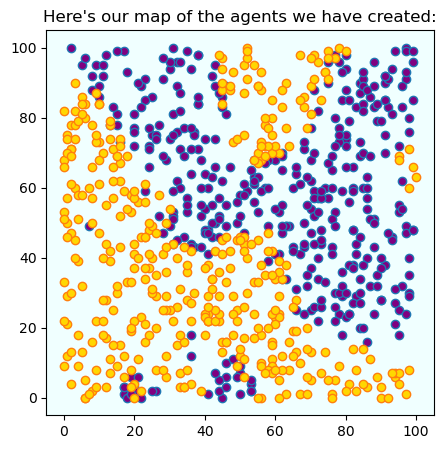

14


In [51]:
# What happens if we run it again but with a threshold of only 0.4?
# Let's run this simulation with 400 of each type of agent.
# Modify the code below to test it out.

random.seed(202)
group_affinity_threshold = .4
testlist = [PurpleAgents(random.randint(0,100), random.randint(0,100))for i in range(400)] + [GoldAgents(random.randint(0,100), random.randint(0,100))for i in range(400)] ###### create a testlist that has 400 PurpleAgents and 400 GoldAgents
map_colorful_agents(testlist)
for x in range(15):
    for agent in (testlist):
        agent.check_neighbors(testlist)  #does this need any arguments?
    for agent in (testlist):
        agent.move_if_unhappy() # does this need any arguments?
    map_colorful_agents(testlist)
    print(x)
    time.sleep(.5)
    display.clear_output(wait=True)


Problem 7

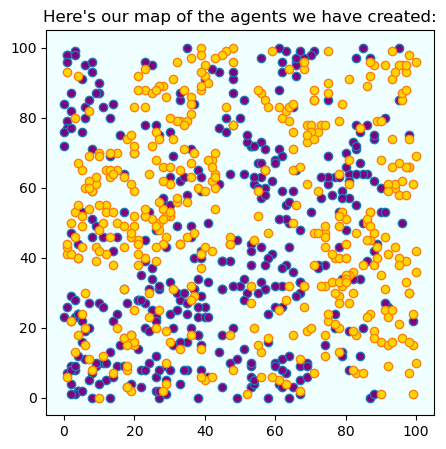

14


In [53]:
# Even if people don't mind being a minority in their neighborhood, you still
# get segregation pretty easily according to this model. For a long time models
# such as this were used to argue that some degree of segregation was
# inevitable, and therefore it should not be a target of policy.

# Let's challenge that assumption.
# Make 2 new subclasses, 'PurpleDiversitySeekers' and 'GoldDiversitySeekers'.
# Please use those exact names to allow for autograding.
# For these subclasses, make them seek out diversity instead of avoid it.
# Run some simulations with 300 traditional PurpleAgents, 300 traditional
# GoldAgents, 100 PurpleDiversitySeekers, and 100 GoldDiversitySeekers.
# What happens now?
random.seed(11)
group_affinity_threshold = .51

class PurpleDiversitySeekers(PurpleAgents):
    pass

    def check_neighbors(self, agentlist):  # note this method needs not only the self attributes - it also needs a list of agents
        zlist = list(filter(lambda x: (x.x - self.x < 10) and (x.x - self.x) > -10, agentlist))### here, use a filter and a lambda function to find all agents in a list who are within 10 spaces in the X direction of the agent that is calling the method
        zlist = list(filter(lambda x: (x.y - self.y < 10) and (x.y - self.y) > -10, zlist))### do the same thing now to filter for agents within 10 spaces in the y direction - what list do you want to apply this lambda function to?
        same_group_neighbor =  [agent for agent in zlist if agent.group == self.group]### use list comprehension to only keep members of zlist who are of the same group as this agent
        opposite_group_neighbor = [agent for agent in zlist if agent.group != self.group]### use list comprehension to only keep members of zlist who are of the opposite group as this agent
        #print(len(same_group_neighbor), "same group neighbors, and ", len(zlist), " total neighbors" ) #Delete# this is commented out but you can use this as a diagnostic to make sure its working
        if (len(opposite_group_neighbor)+.01)/(len(zlist)+.01) > group_affinity_threshold: # this command works; it checks the percentage of same group neighbors against some threshold to determine the agents happiness
            self.status="happy"
        else:
            self.status="unhappy"

class GoldDiversitySeekers(GoldAgents):
    pass

    def check_neighbors(self, agentlist):  # note this method needs not only the self attributes - it also needs a list of agents
        zlist = list(filter(lambda x: (x.x - self.x < 10) and (x.x - self.x) > -10, agentlist))### here, use a filter and a lambda function to find all agents in a list who are within 10 spaces in the X direction of the agent that is calling the method
        zlist = list(filter(lambda x: (x.y - self.y < 10) and (x.y - self.y) > -10, zlist))### do the same thing now to filter for agents within 10 spaces in the y direction - what list do you want to apply this lambda function to?
        same_group_neighbor =  [agent for agent in zlist if agent.group == self.group]### use list comprehension to only keep members of zlist who are of the same group as this agent
        opposite_group_neighbor = [agent for agent in zlist if agent.group != self.group]### use list comprehension to only keep members of zlist who are of the opposite group as this agent
        #print(len(same_group_neighbor), "same group neighbors, and ", len(zlist), " total neighbors" ) #Delete# this is commented out but you can use this as a diagnostic to make sure its working
        if (len(opposite_group_neighbor)+.01)/(len(zlist)+.01) > group_affinity_threshold: # this command works; it checks the percentage of same group neighbors against some threshold to determine the agents happiness
            self.status="happy"
        else:
            self.status="unhappy"

testlist = [PurpleAgents(random.randint(0,100), random.randint(0,100))for i in range(300)] + [GoldAgents(random.randint(0,100), random.randint(0,100))for i in range(300)] + [PurpleDiversitySeekers(random.randint(0,100), random.randint(0,100))for i in range(100)] + [GoldDiversitySeekers(random.randint(0,100), random.randint(0,100))for i in range(100)] ###### create a testlist that has 400 PurpleAgents and 400 GoldAgents
map_colorful_agents(testlist)
for x in range(15):
    for agent in (testlist):
        agent.check_neighbors(testlist)  #does this need any arguments?
    for agent in (testlist):
        agent.move_if_unhappy() # does this need any arguments?
    map_colorful_agents(testlist)
    print(x)
    time.sleep(.5)
    display.clear_output(wait=True)